In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling2D
import numpy as np
import logging
tf.get_logger().setLevel(logging.ERROR)

In [2]:
EPOCHS = 128
BATCH_SIZE = 32

# load dataset
cifar_dataset = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar_dataset.load_data()

# data standardization
mean = np.mean(train_images)
stddev = np.std(train_images)
train_images = (train_images - mean) / stddev
test_images = (test_images - mean) / stddev
print('mean: ', mean)
print('stddev: ', stddev)

# one-hot encoding
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# model architecture
model = Sequential()
model.add(Conv2D(64, (4, 4), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same', strides=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# model compilation and training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics =['accuracy'])
model.summary()

history = model.fit(
    train_images, train_labels,
    validation_data = (test_images, test_labels),
    epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=2, shuffle=True
)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
mean:  120.70756512369792
stddev:  64.1500758911213


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,242 (715.79 KB)

 Trainable params: 183,242 (715.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/128
1563/1563 - 23s - 15ms/step - accuracy: 0.3895 - loss: 1.6640 - val_accuracy: 0.5263 - val_loss: 1.3298
Epoch 2/128
1563/1563 - 8s - 5ms/step - accuracy: 0.5154 - loss: 1.3419 - val_accuracy: 0.5808 - val_loss: 1.1994
Epoch 3/128
1563/1563 - 7s - 4ms/step - accuracy: 0.5647 - loss: 1.2214 - val_accuracy: 0.6189 - val_loss: 1.0957
Epoch 4/128
1563/1563 - 10s - 7ms/step - accuracy: 0.5975 - loss: 1.1436 - val_accuracy: 0.6469 - val_loss: 1.0071
Epoch 5/128
1563/1563 - 10s - 6ms/step - accuracy: 0.6226 - loss: 1.0801 - val_accuracy: 0.6705 - val_loss: 0.9563
Epoch 6/128
1563/1563 - 10s - 6ms/step - accuracy: 0.6396 - loss: 1.0359 - val_accuracy: 0.6709 - val_loss: 0.9544
Epoch 7/128
1563/1563 - 7s - 4ms/step - accuracy: 0.6531 - loss: 0.9946 - val_accuracy: 0.6841 - val_loss: 0.9028
Epoch 8/128
1563/1563 - 11s - 7ms/step - accuracy: 0.6625 - loss: 0.9640 - val_accuracy: 0.7007 - val_loss: 0.8753
Epoch 9/128
1563/1563 - 10s - 6ms/step - accuracy: 0.6729 - loss: 0.9438 - val_acc

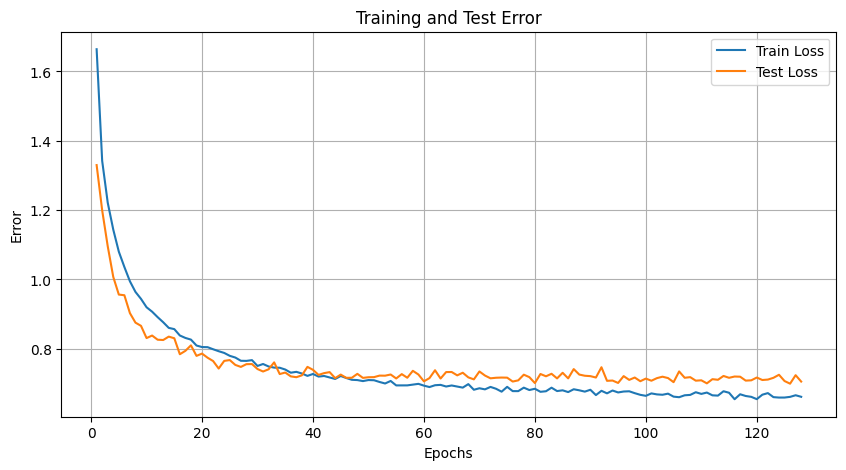

In [3]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, EPOCHS + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs_range, train_loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Training and Test Error')
plt.legend()
plt.grid()
plt.show()

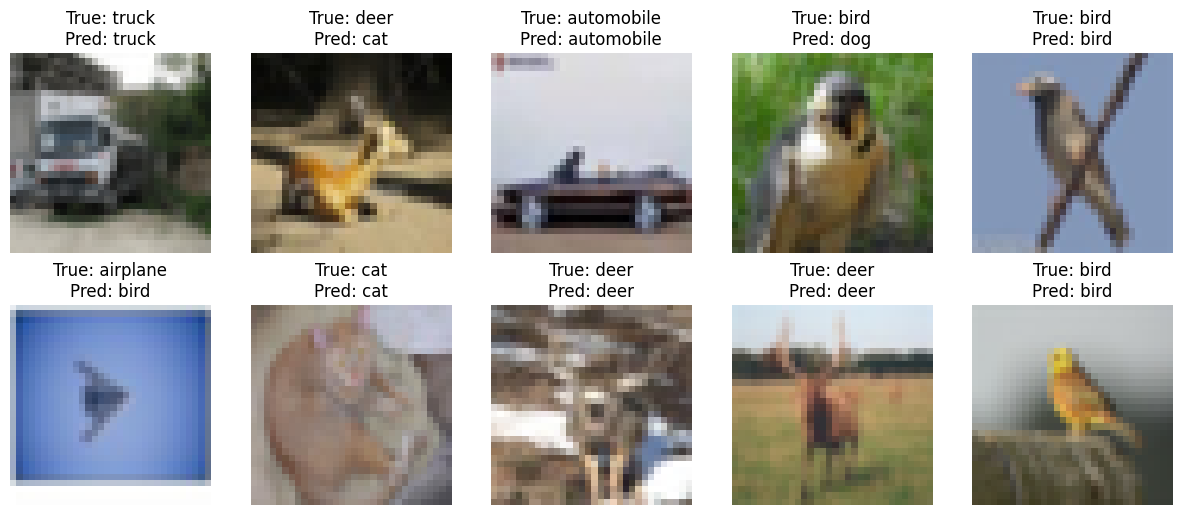

In [11]:
# CIFAR-10 labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

num_samples = 10

plt.figure(figsize=(15, 6))
indices = np.random.choice(len(test_images), num_samples, replace=False)

for i, idx in enumerate(indices):
  img = test_images[idx]
  label = np.argmax(test_labels[idx])
  prediction = model.predict(np.expand_dims(img, axis=0), verbose=0)
  pred_label = np.argmax(prediction)

  plt.subplot(2, num_samples//2, i+1)
  plt.imshow(((img * stddev) + mean).astype('uint8'))
  plt.title(f'True: {class_names[label]}\nPred: {class_names[pred_label]}')
  plt.axis('off')
plt.show()